---

# Plot Variable of Interest Across Studies


## Import

In [1]:
# Import packages we'll use

import importlib
import numpy as np
import pandas as pnd
idx = pnd.IndexSlice

import os, sys
from pathlib import Path
import datetime as dt
import time

import matplotlib.pyplot as plt
# import matplotlib.colormaps as colormaps
# from plt import colormaps
import seaborn as sns
from contextlib import redirect_stdout

###  load calsim object for conveninece #<-- setting path - ***NOTE: YOU'LL WANT TO CHANGE THIS TO 
                                                            # THE LOCATION ON YOUR COMPUTER WHERE THE
                                                            # cs3.py FILE IS SAVED
sys.path.insert(0,r'C:\Dino\COEQWAL\CalLite_v3\Utilities\Python_DSS\CalSim_Python')
sys.path.append('C:\\Dino\\COEQWAL\\CalLite_v3\\Utilities\\Python_DSS\\PyDSS')
import dss3_functions_reference as dss
#import cs3  #<-- main calsim file
import cs3_debug as cs3  #<-- main calsim file
import cs_util as util  #<-- utilities
import AuxFunctions as af  #<-- DSS utilities
import csPlots   #<-- CalSim plots


## Define variable of interest to compare across studies

In [2]:
VariableOfInterest = 'S_SHSTA'
# VariableOfInterest = 'DEL_SWP_PAG' # multiple variables contain this string!


## Make directory

In [3]:
path = os.path.join('./', VariableOfInterest)
os.makedirs(path, exist_ok=True)
fPath = './' + VariableOfInterest + './'
print("Directory '%s' created" %fPath) 


Directory './S_SHSTA./' created


## Read Studies

In [4]:
# Excel file with listing of studies (paths to DSS files)
studyfp = r'C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\calliteEXP01_selected_studies.xlsx'
#stuhdr, stuname = af.read_from_excel(studyfp, 'Studies','A1','A15',hdr=True)
#abbhdr, abbname = af.read_from_excel(studyfp, 'Studies','B1','B15',hdr=True)
#lauhdr, launame = af.read_from_excel(studyfp, 'Studies','C1','C15',hdr=True)
stuhdr, stuname = af.read_from_excel(studyfp, 'Studies','A1','A10',hdr=True)
abbhdr, abbname = af.read_from_excel(studyfp, 'Studies','B1','B10',hdr=True)
lauhdr, launame = af.read_from_excel(studyfp, 'Studies','C1','C10',hdr=True)


In [5]:
study_names = []
for i in stuname:
    study_names = study_names + i

study_names

['cl_coeqwal_exp0001',
 'cl_coeqwal_exp0002',
 'cl_coeqwal_exp0003',
 'cl_coeqwal_exp0004',
 'cl_coeqwal_exp0005',
 'cl_coeqwal_exp0006',
 'cl_coeqwal_exp0009',
 'cl_coeqwal_exp0011',
 'cl_combined']

In [6]:
alias = []
for i in abbname:
    alias = alias + i

alias

['Min10Ag',
 'Min20Ag',
 'CarrPlus10',
 'CarrPlus20',
 'EqPri',
 'NoNDO',
 'Sac40',
 'Sac60',
 'Baseline']

In [7]:
launch_names = []
for i in launame:
    launch_names = launch_names + i

launch_names

['cl_coeqwal_exp0001.launch',
 'cl_coeqwal_exp0002.launch',
 'cl_coeqwal_exp0003.launch',
 'cl_coeqwal_exp0004.launch',
 'cl_coeqwal_exp0005.launch',
 'cl_coeqwal_exp0006.launch',
 'cl_coeqwal_exp0009.launch',
 'cl_coeqwal_exp0011.launch',
 'cl_combined.launch']

## Read variables

In [8]:
#study_names = ['CalLite3.0_Release_V2jmg_RegBase'] # to be changed later to read from calsim3_selected_studies
#launch_names = ['callite3_dwr_v2_reg_base.launch']
#alias = ['baseline']

#study_names = ['CalLite3.0_Release_V2jmg_RegBase', 'CalLite3.0_Release_V2jmg_RegNoX2'] # to be changed later to read from calsim3_selected_studies
#launch_names = ['callite3_dwr_v2_reg_base.launch', 'callite3_dwr_v2_reg_nox2.launch']
#alias = ['baseline', 'regnoX2']

# Excel file with listing of variables (B & C parts)
xlfp = r'C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\calsim3_callite_selected_output_variables_jmg.xlsx'
xltab = r'callite_exp_selvars_priority'

# launch file path to example CalLite (or CalSim) study
launch_base_directory = r'C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs'
#launchFP = os.path.join(launch_base_directory, 'CalLite3.0_Release_V2jmg_RegBase\callite3_dwr_v2_reg_base.launch') 

# set the output location -default is in the base directory with the launchfile
#outdir = os.path.dirname(launchFP)  #<-- you can change this to something else if you want!
outdir = os.path.dirname(launch_base_directory)  #<-- you can change this to something else if you want!

stohdr, stovars = af.read_from_excel(xlfp, xltab,'A3','C8',hdr=True)
flohdr, flovars = af.read_from_excel(xlfp, xltab,'H3','J13',hdr=True)
delhdr, delvars = af.read_from_excel(xlfp, xltab,'P3','Q13',hdr=True)

deldf_vars = pnd.DataFrame(data=delvars, columns=delhdr)
stodf_vars = pnd.DataFrame(data=stovars, columns=stohdr)
flodf_vars = pnd.DataFrame(data=flovars, columns=flohdr)

In [9]:
stodf_vars

,Reservoir Name,DSS Part B,DSS Part C
0,Shasta,S_SHSTA,STORAGE
1,Oroville,S_OROVL,STORAGE
2,San Luis - Federal,S_SLCVP,STORAGE
3,San Luis - State,S_SLSWP,STORAGE
4,Millerton,S_MLRTN,STORAGE


In [10]:
deldf_vars

,DSS Part B,DSS Part C
0,DEL_CVP_TOTAL_N,DELIVERY-CVP
1,DEL_CVP_TOTAL_S,DELIVERY-CVP
2,DEL_CVP_PAG_N,DELIVERY-CVP
3,DEL_CVP_PAG_S,DELIVERY-CVP
4,DEL_CVP_PSC_N,DELIVERY-CVP
5,DEL_CVP_PEX_S,DELIVERY-CVP
6,DEL_SWP_PAG_N,DELIVERY-SWP
7,DEL_SWP_PAG_S,DELIVERY-SWP
8,DEL_SWP_PMI,DELIVERY-SWP
9,DEL_SWP_PAG,DELIVERY-SWP


In [11]:
flodf_vars

,Description,DSS Part B,DSS Part C
0,Sac R below Wilkins Slough,C_WILKNS,FLOW-CHANNEL
1,Feather River above confluence with Sac R,C_YUBFEA,FLOW-CHANNEL
2,American River above confluence with Sac r,C_HST,FLOW-CHANNEL
3,Sac R at Hood,C_HOOD,FLOW-CHANNEL
4,Total Delta Outflow,C_SACSJR,FLOW-CHANNEL
5,Required Delta Outflow,D_DELTAREQD,FLOW-DELIVERY
6,Excess Delta Outflow,C_DELTA,FLOW-CHANNEL
7,Federal Export Pumping at Jones,D_JONES,FLOW-DELIVERY
8,State Export Pumping at Banks,D_BANKS,FLOW-DELIVERY
9,San Joaquin River at Vernalis,C_SJRVER,FLOW-CHANNEL


## Create datasets across studies (add some storage variables)


In [12]:
def preprocess_data(df, addsl=False):
    dvar_list = []
    combined_df = pnd.DataFrame()
    
    for i, r in df.iterrows():
        dvar_list.append(f'/{r["DSS Part B"]}/{r["DSS Part C"]}/')

    for study_name, launch_name, alias_name in zip(study_names, launch_names, alias):

        launchFP_study = os.path.join(launch_base_directory, study_name)
        launchFP = os.path.join(launchFP_study, launch_name)
        print(launchFP)
        
        # Create a python "calsim" object
        thiscs3 = cs3.calsim(launchFP=launchFP, csvers=3, reorg=True)

        # Retrieve the DSS data variables from the DSS file
        thiscs3.DVdata.getDVts(filter=dvar_list)

        df = thiscs3.DVdata.DVtsDF.copy(deep=True)
        
        # if storage add the 2 variables to create a new one
        # Add S_SLSCVP and S_SLSWP into S_SLTOT

        if addsl:
            df[('CALLITE', 'S_SLTOT', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,[('CALLITE', 'S_SLCVP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'),('CALLITE', 'S_SLSWP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')]].sum(axis=1)
      
        new_columns = [(col[0], f'{col[1]}_{alias_name}', *col[2:]) if len(col) > 1 else (col[0], '') for col in df.columns]
        df.columns = pnd.MultiIndex.from_tuples(new_columns)
        df.columns.names = ['A', 'B', 'C', 'D', 'E', 'F', 'Units']
        combined_df = pnd.concat([combined_df, df], axis=1)
    
    return combined_df

In [13]:
deldf = preprocess_data(deldf_vars)
stodf = preprocess_data(stodf_vars)
flodf = preprocess_data(flodf_vars)

C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0001\cl_coeqwal_exp0001.launch
Project directory set as: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0001

Opened file: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0001\DSS\cl_coeqwal_exp0001.dss


******************************************
	Empty Catalog Path List - Trying Again
	 to retrieve the catalog data
	 C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0001\DSS\cl_coeqwal_exp0001.dss
*******************************************

-------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this function 
or another system process (Excel add-in, I'm looking at you...)

---DO NOT MODIFY THE CATALOG FILES (*.dsc, *.dsd) 
---WHILE RUNNING THIS PYTHON SESSION!!!

Valid catalog found: True 
Number of records: 38196
Took 0.038896322250

Took 0.04288434982299805 sec to convert paths to dataframe
Took 0.008942127227783203 sec to do group-by operation
Took 0.003988504409790039 sec to add column
Took 0.21246767044067383 sec to rebuild modified path
Filtering path list
C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0011\cl_coeqwal_exp0011.launch
Project directory set as: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0011

Opened file: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0011\DSS\cl_coeqwal_exp0011.dss


******************************************
	Empty Catalog Path List - Trying Again
	 to retrieve the catalog data
	 C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0011\DSS\cl_coeqwal_exp0011.dss
*******************************************

-------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this functi

Took 0.008975505828857422 sec to do group-by operation
Took 0.0010132789611816406 sec to add column
Took 0.2184007167816162 sec to rebuild modified path
Filtering path list
C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0006\cl_coeqwal_exp0006.launch
Project directory set as: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0006

Opened file: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0006\DSS\cl_coeqwal_exp0002.dss


******************************************
	Empty Catalog Path List - Trying Again
	 to retrieve the catalog data
	 C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0006\DSS\cl_coeqwal_exp0002.dss
*******************************************

-------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this function 
or another system process (Excel add-in, I'm looking at

Took 0.03989267349243164 sec to convert paths to dataframe
Took 0.008015871047973633 sec to do group-by operation
Took 0.0009622573852539062 sec to add column
Took 0.21146631240844727 sec to rebuild modified path
Filtering path list
C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0004\cl_coeqwal_exp0004.launch
Project directory set as: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0004

Opened file: C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0004\DSS\cl_coeqwal_exp0002.dss


******************************************
	Empty Catalog Path List - Trying Again
	 to retrieve the catalog data
	 C:\Dino\COEQWAL\CalLite_v3\Baseline_DWR_CL3v2\00_Integrated_Runs\cl_coeqwal_exp0004\DSS\cl_coeqwal_exp0002.dss
*******************************************

-------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this funct

In [14]:
deldf.head(10)
print(deldf.columns)

MultiIndex([('CALLITE',      'DEL_CVP_PAG_N_Min10Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',      'DEL_CVP_PAG_S_Min10Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',      'DEL_CVP_PEX_S_Min10Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',      'DEL_CVP_PSC_N_Min10Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',    'DEL_CVP_TOTAL_N_Min10Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',    'DEL_CVP_TOTAL_S_Min10Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',        'DEL_SWP_PAG_Min10Ag', 'DELIVERY-SWP', ...),
            ('CALLITE',      'DEL_SWP_PAG_N_Min10Ag', 'DELIVERY-SWP', ...),
            ('CALLITE',      'DEL_SWP_PAG_S_Min10Ag', 'DELIVERY-SWP', ...),
            ('CALLITE',        'DEL_SWP_PMI_Min10Ag', 'DELIVERY-SWP', ...),
            ('CALLITE',      'DEL_CVP_PAG_N_Min20Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',      'DEL_CVP_PAG_S_Min20Ag', 'DELIVERY-CVP', ...),
            ('CALLITE',      'DEL_CVP_PEX_S_Min20Ag', 'DELIVERY-CVP', ...),
            

In [15]:
stodf.head(10)
print(stodf.columns)

MultiIndex([('CALLITE',    'S_MLRTN_Min10Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_OROVL_Min10Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_SHSTA_Min10Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_SLCVP_Min10Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_SLSWP_Min10Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_MLRTN_Min20Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_OROVL_Min20Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_SHSTA_Min20Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_SLCVP_Min20Ag', 'STORAGE', '1MON', ...),
            ('CALLITE',    'S_SLSWP_Min20Ag', 'STORAGE', '1MON', ...),
            ('CALLITE', 'S_MLRTN_CarrPlus10', 'STORAGE', '1MON', ...),
            ('CALLITE', 'S_OROVL_CarrPlus10', 'STORAGE', '1MON', ...),
            ('CALLITE', 'S_SHSTA_CarrPlus10', 'STORAGE', '1MON', ...),
            ('CALLITE', 'S_SLCVP_CarrPlus10', 'STORAGE', '1MON', ...),
      

In [16]:
flodf.head(10)
print(flodf.columns)

MultiIndex([('CALLITE',        'C_DELTA_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',         'C_HOOD_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',          'C_HST_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',       'C_SACSJR_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',       'C_SJRVER_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',       'C_WILKNS_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',       'C_YUBFEA_Min10Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',        'D_BANKS_Min10Ag', 'FLOW-DELIVERY', ...),
            ('CALLITE',    'D_DELTAREQD_Min10Ag', 'FLOW-DELIVERY', ...),
            ('CALLITE',        'D_JONES_Min10Ag', 'FLOW-DELIVERY', ...),
            ('CALLITE',        'C_DELTA_Min20Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',         'C_HOOD_Min20Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',          'C_HST_Min20Ag',  'FLOW-CHANNEL', ...),
            ('CALLITE',       'C_SACSJR_Min20Ag',  

In [17]:
merged_df = pnd.concat([deldf, stodf, flodf], axis=1)
merged_df.head(10)

A                        CALLITE                                              \
B          DEL_CVP_PAG_N_Min10Ag DEL_CVP_PAG_S_Min10Ag DEL_CVP_PEX_S_Min10Ag   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                       2020D09E              2020D09E              2020D09E   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        CFS                   CFS                   CFS   
1921-10-31             72.608154            829.896667            978.930847   
1921-11-30              0.000000            632.994080            336.382050   
1921-12-31              0.000000            875.842407            147.935471   
1922-01-31              0.000000           1537.437500            153.597214   
1922-02-28              0.000000           1938.772217            442.686554   
1922-03-31              7.516846           1190.882202           1126.866333   
1922-04-30            671.083740           1770.292114           1170.278931   
1922-05-31            847.501770           2743.053467           1563.312378   
1922-06-30           1099.304199           4577.850098           2131.734619   
1922-07-31           1206.369019           5505.467285           2421.484131   

A                                                         \
B          DEL_CVP_PSC_N_Min10Ag DEL_CVP_TOTAL_N_Min10Ag   
C                   DELIVERY-CVP            DELIVERY-CVP   
D                           1MON                    1MON   
E                       2020D09E                2020D09E   
F                       PER-AVER                PER-AVER   
Units                        CFS                     CFS   
1921-10-31            758.318115             1301.978271   
1921-11-30            940.111389             1259.847778   
1921-12-31              0.000000              281.372681   
1922-01-31             21.212244              215.815094   
1922-02-28              0.000000              202.722061   
1922-03-31             12.369557              174.525208   
1922-04-30           1665.990356             2689.947266   
1922-05-31           5103.218262             6595.271484   
1922-06-30           5773.831055             7579.336914   
1922-07-31           6105.486816             8067.320312   

A                                                                             \
B          DEL_CVP_TOTAL_S_Min10Ag DEL_SWP_PAG_Min10Ag DEL_SWP_PAG_N_Min10Ag   
C                     DELIVERY-CVP        DELIVERY-SWP          DELIVERY-SWP   
D                             1MON                1MON                  1MON   
E                         2020D09E            2020D09E              2020D09E   
F                         PER-AVER            PER-AVER              PER-AVER   
Units                          CFS                 CFS                   CFS   
1921-10-31             3170.878906         2526.639404           1737.846313   
1921-11-30             1981.838867         2404.505371           1861.215332   
1921-12-31             1660.865967         1594.614136           1066.068604   
1922-01-31             2098.740479          560.044067            542.060486   
1922-02-28             2748.421387           29.456339              0.000000   
1922-03-31             2819.468994          146.578110              0.000000   
1922-04-30             3586.265381         2305.289795           1975.627441   
1922-05-31             5237.171387         2867.353760           1949.953979   
1922-06-30             7880.953125         4631.699219           2390.657471   
1922-07-31             8825.416992         4609.408203           2212.982666   

A                                                     ...                   \
B          DEL_SWP_PAG_S_Min10Ag DEL_SWP_PMI_Min10Ag  ... C_DELTA_Baseline   
C                   DELIVERY-SWP        DELIVERY-SWP  ...     FLOW-CHANNEL   
D                      

### Write the DSS outputs to a CSV



In [18]:
outnam = os.path.basename(launch_base_directory) + '_selOutputs.csv' #<-- the default approach here and next line
outfp = os.path.join(launch_base_directory, outnam) 

#outfp = 'test_output_csv.csv'

merged_df.to_csv(outfp, header=True)

In [19]:
## NOTE: change this to take a list as input
def create_subset(df, varname):
    filtered_columns = df.columns.get_level_values(1).str.contains(varname)
#     filtered_columns = df.columns.get_level_values(1).str.eq(varname)
    print(filtered_columns)
    return df.loc[:, filtered_columns]

## Subset by variable across studies

In [20]:
filter_df = create_subset(merged_df, VariableOfInterest)
filter_df.head(10)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False  True False False False False  True False False False False  True
 False False False False  True False False False False  True False False
 False False  True False False False False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1921-10-31     2737.145752     2736.188965        2738.305664   
1921-11-30     2714.284180     2722.502930        2705.427979   
1921-12-31     2889.640381     2897.853027        2880.790771   
1922-01-31     3036.285156     3044.492920        3027.440918   
1922-02-28     3462.904053     3471.106445        3454.065674   
1922-03-31     3908.583496     3916.776367        3899.755859   
1922-04-30     4521.661621     4529.841797        4512.844727   
1922-05-31     4552.000000     4552.000000        4552.000000   
1922-06-30     4335.022461     4358.215820        4321.290527   
1922-07-31     3944.379150     3992.502930        3915.043457   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1921-10-31        2738.305664   2738.305664   2748.446777   2741.606201   
1921-11-30        2705.427979   2705.427979   2633.735107   2766.697998   
1921-12-31        2880.790771   2880.790771   2809.150391   2942.015625   
1922-01-31        3027.440918   3027.440918   2955.844238   3088.628662   
1922-02-28        3454.065674   3454.065674   3395.007568   3515.213135   
1922-03-31        3899.755859   3899.755859   3915.723145   3960.830811   
1922-04-30        4512.844727   4512.844727   4453.847168   4552.000000   
1922-05-31        4552.000000   4552.000000   4552.000000   4552.000000   
1922-06-30        4353.906738   4321.290527   4321.290527   4384.565918   
1922-07-31        3984.513916   3915.043457   3915.043457   4045.640381   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1921-10-31   2741.606201      2738.305664  
1921-11-30   2766.697998      2705.427979  
1921-12-31   2942.015625      2880.790771  
1922-01-31   3088.628662      3027.440918  
1922-02-28   3515.213135      3454.065674  
1922-03-31   3960.830811      3899.755859  
1922-04-30   4392.574707      4512.844727  
1922-05-31   4413.860352      4552.000000  
1922-06-30   4144.862305      4321.290527  
1922-07-31   3813.100342      3915.043457

In [21]:
filter_df.index

DatetimeIndex(['1921-10-31', '1921-11-30', '1921-12-31', '1922-01-31',
               '1922-02-28', '1922-03-31', '1922-04-30', '1922-05-31',
               '1922-06-30', '1922-07-31',
               ...
               '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31',
               '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31',
               '2003-08-31', '2003-09-30'],
              dtype='datetime64[ns]', length=984, freq=None)

## Subset by study

In [22]:
baseline_df = create_subset(merged_df, 'Baseline')
baseline_df.head(10)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

A                         CALLITE                         \
B          DEL_CVP_PAG_N_Baseline DEL_CVP_PAG_S_Baseline   
C                    DELIVERY-CVP           DELIVERY-CVP   
D                            1MON                   1MON   
E                        2020D09E               2020D09E   
F                        PER-AVER               PER-AVER   
Units                         CFS                    CFS   
1921-10-31              79.622688             922.124268   
1921-11-30               0.000000             703.339600   
1921-12-31               0.000000             973.176086   
1922-01-31               0.000000            1708.295288   
1922-02-28               0.000000            2154.230957   
1922-03-31               8.352051            1140.813354   
1922-04-30             745.209778            1753.950562   
1922-05-31             941.244019            2740.588379   
1922-06-30            1220.790894            4573.736328   
1922-07-31            1339.773071            5500.519531   

A                                                         \
B          DEL_CVP_PEX_S_Baseline DEL_CVP_PSC_N_Baseline   
C                    DELIVERY-CVP           DELIVERY-CVP   
D                            1MON                   1MON   
E                        2020D09E               2020D09E   
F                        PER-AVER               PER-AVER   
Units                         CFS                    CFS   
1921-10-31             978.930847             804.657227   
1921-11-30             336.382050             990.790405   
1921-12-31             147.935471               0.000000   
1922-01-31             153.597214              24.395163   
1922-02-28             442.686554               0.000000   
1922-03-31            1126.866333              12.369557   
1922-04-30            1170.278931            1743.064453   
1922-05-31            1563.312378            5230.251465   
1922-06-30            2131.734619            5939.481445   
1922-07-31            2421.484131            6275.006348   

A                                                             \
B          DEL_CVP_TOTAL_N_Baseline DEL_CVP_TOTAL_S_Baseline   
C                      DELIVERY-CVP             DELIVERY-CVP   
D                              1MON                     1MON   
E                          2020D09E                 2020D09E   
F                          PER-AVER                 PER-AVER   
Units                           CFS                      CFS   
1921-10-31              1412.067749              3263.098877   
1921-11-30              1403.360840              2052.179443   
1921-12-31               281.372681              1758.197388   
1922-01-31               219.279205              2269.597168   
1922-02-28               203.117661              2963.879150   
1922-03-31               176.037125              2769.399414   
1922-04-30              2841.729736              3569.922363   
1922-05-31              6816.816406              5234.703125   
1922-06-30              7867.297363              7876.835938   
1922-07-31              8371.333984              8820.468750   

A                                                                              \
B          DEL_SWP_PAG_Baseline DEL_SWP_PAG_N_Baseline DEL_SWP_PAG_S_Baseline   
C                  DELIVERY-SWP           DELIVERY-SWP           DELIVERY-SWP   
D                          1MON                   1MON                   1MON   
E                      2020D09E               2020D09E               2020D09E   
F                      PER-AVER               PER-AVER               PER-AVER   
Units                       CFS                    CFS                    CFS   
1921-10-31          2646.712402            1770.275635             876.436829   
1921-11-30          2464.870850            1861.215332             603.655579   
1921-12-31          1653.341431            1066.068604             587.272827   
1922-01-31           557.208740             542.060486     

In [23]:
print(merged_df.columns)

MultiIndex([('CALLITE',   'DEL_CVP_PAG_N_Min10Ag',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PAG_S_Min10Ag',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PEX_S_Min10Ag',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PSC_N_Min10Ag',  'DELIVERY-CVP', ...),
            ('CALLITE', 'DEL_CVP_TOTAL_N_Min10Ag',  'DELIVERY-CVP', ...),
            ('CALLITE', 'DEL_CVP_TOTAL_S_Min10Ag',  'DELIVERY-CVP', ...),
            ('CALLITE',     'DEL_SWP_PAG_Min10Ag',  'DELIVERY-SWP', ...),
            ('CALLITE',   'DEL_SWP_PAG_N_Min10Ag',  'DELIVERY-SWP', ...),
            ('CALLITE',   'DEL_SWP_PAG_S_Min10Ag',  'DELIVERY-SWP', ...),
            ('CALLITE',     'DEL_SWP_PMI_Min10Ag',  'DELIVERY-SWP', ...),
            ...
            ('CALLITE',        'C_DELTA_Baseline',  'FLOW-CHANNEL', ...),
            ('CALLITE',         'C_HOOD_Baseline',  'FLOW-CHANNEL', ...),
            ('CALLITE',          'C_HST_Baseline',  'FLOW-CHANNEL', ...),
            ('CALLITE'

### Write the DSS outputs to a CSV


In [24]:
outnam = os.path.basename(outdir)+ '_selOutputs.csv' #<-- the default approach here and next line
outfp = os.path.join(outdir, outnam) 
merged_df.to_csv(outfp, header=True)

## Plotting Functions

Need to look example file "general_plots_v20231115.py" is posted to the Google Drive with the example files/scripts in the Python_DSS directory (here: https://drive.google.com/drive/folders/1JbN0eYKNM0772P0XMj0S7Fyl7I9GZxfW?usp=drive_link). Also the plotting.yml file to list out and define which CalSim/CalLite studies to plot and analyze. If you want to test it out yourself, you'll need ot update the paths to your own CalLite/CalSim studies.


In [25]:
def plot_ts(df, pTitle = 'Time Series', xLab = 'Date', lTitle = 'Studies', fTitle = 'mon_tot', pSave = True, fPath = './', cMap = plt.cm.tab10):
    
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    colormap = cMap
    colors = [colormap(i) for i in range(df.shape[1])]
#     colors[-1] = colors[0]
#     colors[0] = [0,0,0,1]
    colors[-1] = [0,0,0,1]

    count = 0
    
    plt.figure(figsize=(14, 8))
    
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    studies = [col[1].split('_')[-1] for col in df.columns]

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
#             if count == 0:
#                 sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width*2)
#             else:
#                 sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            count+=1
            
    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
     
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
   

In [26]:
def plot_annual_totals(df, xLab = 'Date', pTitle = 'Annual Totals', lTitle = 'Studies', fTitle = 'ann_tot', pSave = True, fPath = './', cMap = plt.cm.tab10):
    
    annualized_df = pnd.DataFrame()
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    studies = [col[1].split('_')[-1] for col in df.columns]
        
    colormap = cMap
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]
        
    i=0

    plt.figure(figsize=(14, 8))
        
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            with redirect_stdout(open(os.devnull, 'w')):
                df_ann = csPlots.annualize(df.loc[:, [df.columns[i]]])
                annualized_df = pnd.concat([annualized_df,df_ann], axis=1)
                annualized_col_name = df_ann.columns[0]
                sns.lineplot(data = df_ann, x=df_ann.index, y=annualized_col_name, label=f'{study}', color = colors[i],
                            linewidth = scaled_line_width)
                i+=1
                    

    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
        
#       plt.savefig(f'{var}_annual_totals.png', bbox_inches='tight', dpi=600, transparent=True)
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
    return(annualized_df)

In [27]:
def plot_exceedance(df, xLab = 'Probability', pTitle = 'Exceedance Probability', lTitle = 'Studies', fTitle = 'exceed', pSave = True, fPath = './', cMap = plt.cm.tab10): 

    var = '_'.join(df.columns[0][1].split('_')[:-1])
    studies = [col[1].split('_')[-1] for col in df.columns]
    i=0
    
    colormap = cMap
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]

    plt.figure(figsize=(14, 8))
            
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            df_ex = csPlots.single_exceed(df, df.columns[i])
            ex_col_name = df_ex.columns[0]
            sns.lineplot(data = df_ex, x=df_ex.index, y=ex_col_name, label=f'{study}', color = colors[i], linewidth = scaled_line_width)
            i+=1

    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
    
#     plt.savefig(f'{var}_exceedance.png', bbox_inches='tight', dpi=600, transparent=True)
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
   

In [28]:
def plot_moy_averages(df, xLab = 'Month of Year', pTitle = 'Month of Year Average Totals', lTitle = 'Studies', fTitle = 'moy_avg', pSave = True, fPath = './', cMap = plt.cm.tab10):
    df_copy = df.copy()
    df_copy["Month"] = df.index.month
    df_moy = df_copy.groupby('Month').mean()
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    plot_ts(df_moy, pTitle = pTitle, xLab = xLab, lTitle = lTitle, fTitle = fTitle, fPath = fPath)


### Plot timeseries


### Monthly totals

In [29]:
filter_df

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1921-10-31     2737.145752     2736.188965        2738.305664   
1921-11-30     2714.284180     2722.502930        2705.427979   
1921-12-31     2889.640381     2897.853027        2880.790771   
1922-01-31     3036.285156     3044.492920        3027.440918   
1922-02-28     3462.904053     3471.106445        3454.065674   
..                     ...             ...                ...   
2003-05-31     4552.000000     4552.000000        4552.000000   
2003-06-30     4403.368164     4423.783691        4393.123047   
2003-07-31     3746.246338     3842.039551        3758.466064   
2003-08-31     3461.167725     3556.150635        3444.735840   
2003-09-30     3174.827393     3273.408936        3174.220459   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1921-10-31        2738.305664   2738.305664   2748.446777   2741.606201   
1921-11-30        2705.427979   2705.427979   2633.735107   2766.697998   
1921-12-31        2880.790771   2880.790771   2809.150391   2942.015625   
1922-01-31        3027.440918   3027.440918   2955.844238   3088.628662   
1922-02-28        3454.065674   3454.065674   3395.007568   3515.213135   
..                        ...           ...           ...           ...   
2003-05-31        4552.000000   4552.000000   4552.000000   4552.000000   
2003-06-30        4393.449219   4393.123047   4393.123047   4464.995605   
2003-07-31        3758.790527   3711.421143   3753.807617   3807.042969   
2003-08-31        3447.312012   3389.102539   3486.302734   3492.752441   
2003-09-30        3172.613770   3173.188721   3166.376709   3203.129639   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1921-10-31   2741.606201      2738.305664  
1921-11-30   2766.697998      2705.427979  
1921-12-31   2942.015625      2880.790771  
1922-01-31   3088.628662      3027.440918  
1922-02-28   3515.213135      3454.065674  
..                   ...              ...  
2003-05-31   4552.000000      4552.000000  
2003-06-30   4367.248535      4393.123047  
2003-07-31   3697.467773      3733.640137  
2003-08-31   3393.242188      3420.052246  
2003-09-30   3168.116211      3155.764893  

[984 rows x 9 columns]

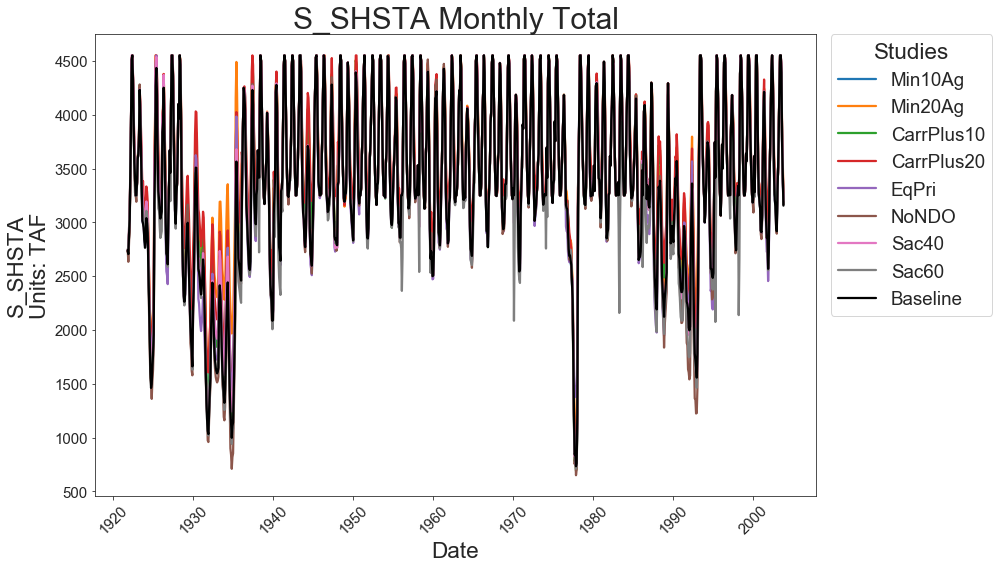

In [30]:
plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

### Yearly totals

In [31]:
filter_df

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1921-10-31     2737.145752     2736.188965        2738.305664   
1921-11-30     2714.284180     2722.502930        2705.427979   
1921-12-31     2889.640381     2897.853027        2880.790771   
1922-01-31     3036.285156     3044.492920        3027.440918   
1922-02-28     3462.904053     3471.106445        3454.065674   
..                     ...             ...                ...   
2003-05-31     4552.000000     4552.000000        4552.000000   
2003-06-30     4403.368164     4423.783691        4393.123047   
2003-07-31     3746.246338     3842.039551        3758.466064   
2003-08-31     3461.167725     3556.150635        3444.735840   
2003-09-30     3174.827393     3273.408936        3174.220459   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1921-10-31        2738.305664   2738.305664   2748.446777   2741.606201   
1921-11-30        2705.427979   2705.427979   2633.735107   2766.697998   
1921-12-31        2880.790771   2880.790771   2809.150391   2942.015625   
1922-01-31        3027.440918   3027.440918   2955.844238   3088.628662   
1922-02-28        3454.065674   3454.065674   3395.007568   3515.213135   
..                        ...           ...           ...           ...   
2003-05-31        4552.000000   4552.000000   4552.000000   4552.000000   
2003-06-30        4393.449219   4393.123047   4393.123047   4464.995605   
2003-07-31        3758.790527   3711.421143   3753.807617   3807.042969   
2003-08-31        3447.312012   3389.102539   3486.302734   3492.752441   
2003-09-30        3172.613770   3173.188721   3166.376709   3203.129639   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1921-10-31   2741.606201      2738.305664  
1921-11-30   2766.697998      2705.427979  
1921-12-31   2942.015625      2880.790771  
1922-01-31   3088.628662      3027.440918  
1922-02-28   3515.213135      3454.065674  
..                   ...              ...  
2003-05-31   4552.000000      4552.000000  
2003-06-30   4367.248535      4393.123047  
2003-07-31   3697.467773      3733.640137  
2003-08-31   3393.242188      3420.052246  
2003-09-30   3168.116211      3155.764893  

[984 rows x 9 columns]

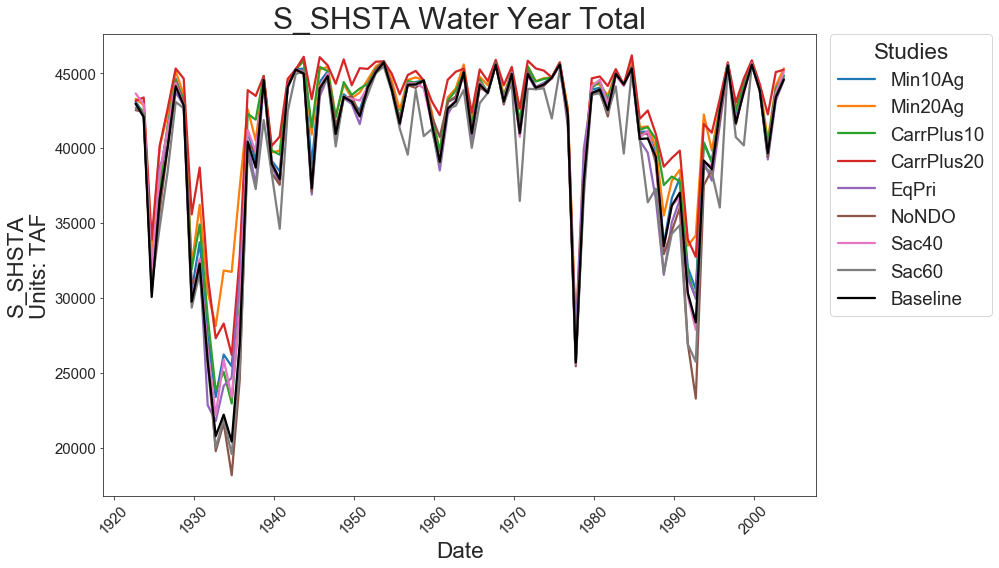

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
E                     1MON            1MON               1MON   
F                 2020D09E        2020D09E           2020D09E   
Type              PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
                   CALLITE         CALLITE            CALLITE   
           S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
                   STORAGE         STORAGE            STORAGE   
                      1MON            1MON               1MON   
                  2020D09E        2020D09E           2020D09E   
                  PER-AVER        PER-AVER           PER-AVER   
                       TAF             TAF                TAF   
1922-09-30    43103.496094    43289.375000       42966.617188   
1923-09-30    42302.652344    42868.042969       42394.070312   
1924-09-30    31111.558594    33167.984375       30996.775391   
1925-09-30    38155.589844    40096.765625       37379.683594   
1926-09-30    41385.835938    42285.242188       41512.046875   
...                    ...             ...                ...   
1999-09-30    45713.636719    45824.675781       45580.203125   
2000-09-30    43971.492188    44168.945312       43844.625000   
2001-09-30    39709.054688    40537.281250       40259.156250   
2002-09-30    43711.156250    44156.296875       44004.554688   
2003-09-30    44863.492188    45320.820312       44820.765625   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
E                        1MON          1MON          1MON          1MON   
F                    2020D09E      2020D09E      2020D09E      2020D09E   
Type                 PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
                      CALLITE       CALLITE       CALLITE       CALLITE   
           S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
                      STORAGE       STORAGE       STORAGE       STORAGE   
                         1MON          1MON          1MON          1MON   
                     2020D09E      2020D09E      2020D09E      2020D09E   
                     PER-AVER      PER-AVER      PER-AVER      PER-AVER   
                          TAF           TAF           TAF           TAF   
1922-09-30       43167.703125  42966.617188  42535.304688  43649.199219   
1923-09-30       43377.796875  42073.351562  42410.562500  42918.066406   
1924-09-30       33880.187500  30976.261719  30408.359375  31909.197266   
1925-09-30       40148.613281  38758.195312  35800.367188  38279.152344   
1926-09-30       42645.332031  40133.242188  40029.207031  41253.785156   
...                       ...           ...           ...           ...   
1999-09-30       45854.289062  45580.250000  45581.046875  45674.875000   
2000-09-30       44255.898438  43834.367188  43882.632812  43844.894531   
2001-09-30       42250.125000  39244.695312  39416.218750  39662.953125   
2002-09-30       45079.660156  43177.808594  43836.304688  43712.136719   
2003-09-30       45226.921875  44548.476562  44628.847656  45095.027344   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
E                   1MON             1MON  
F               2020D09E         2020D09E  
Type            PER-AVER         PER-AVER  
Units                TAF              TAF  
                 CALLITE          CALLITE  
           S_SHSTA_Sac60 S_SHSTA_Baseline  
                 STORAGE          STORAGE  
                    1MON             1MON  
              

In [32]:
# plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
filter_df_ann = plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
filter_df_ann

In [33]:
# make a copy to play around
thisdata = filter_df.copy()
thisdata

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1921-10-31     2737.145752     2736.188965        2738.305664   
1921-11-30     2714.284180     2722.502930        2705.427979   
1921-12-31     2889.640381     2897.853027        2880.790771   
1922-01-31     3036.285156     3044.492920        3027.440918   
1922-02-28     3462.904053     3471.106445        3454.065674   
..                     ...             ...                ...   
2003-05-31     4552.000000     4552.000000        4552.000000   
2003-06-30     4403.368164     4423.783691        4393.123047   
2003-07-31     3746.246338     3842.039551        3758.466064   
2003-08-31     3461.167725     3556.150635        3444.735840   
2003-09-30     3174.827393     3273.408936        3174.220459   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1921-10-31        2738.305664   2738.305664   2748.446777   2741.606201   
1921-11-30        2705.427979   2705.427979   2633.735107   2766.697998   
1921-12-31        2880.790771   2880.790771   2809.150391   2942.015625   
1922-01-31        3027.440918   3027.440918   2955.844238   3088.628662   
1922-02-28        3454.065674   3454.065674   3395.007568   3515.213135   
..                        ...           ...           ...           ...   
2003-05-31        4552.000000   4552.000000   4552.000000   4552.000000   
2003-06-30        4393.449219   4393.123047   4393.123047   4464.995605   
2003-07-31        3758.790527   3711.421143   3753.807617   3807.042969   
2003-08-31        3447.312012   3389.102539   3486.302734   3492.752441   
2003-09-30        3172.613770   3173.188721   3166.376709   3203.129639   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1921-10-31   2741.606201      2738.305664  
1921-11-30   2766.697998      2705.427979  
1921-12-31   2942.015625      2880.790771  
1922-01-31   3088.628662      3027.440918  
1922-02-28   3515.213135      3454.065674  
..                   ...              ...  
2003-05-31   4552.000000      4552.000000  
2003-06-30   4367.248535      4393.123047  
2003-07-31   3697.467773      3733.640137  
2003-08-31   3393.242188      3420.052246  
2003-09-30   3168.116211      3155.764893  

[984 rows x 9 columns]

## Get End of Water Year and end of winter


In [34]:
# if you want data for just specific months, you can do that with something like the following:
thisdata_sep = thisdata[thisdata.index.month.isin([9])]  # picks only values that are in month=9 (September)
thisdata_sep

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1922-09-30     3400.000000     3400.000000        3400.000000   
1923-09-30     3055.994873     3179.937012        3082.252441   
1924-09-30     1622.978638     1871.186157        1547.931885   
1925-09-30     3326.286377     3391.643066        3265.947998   
1926-09-30     2854.791260     2955.340820        2927.715576   
..                     ...             ...                ...   
1999-09-30     3400.000000     3400.000000        3400.000000   
2000-09-30     3220.276367     3292.157715        3200.000000   
2001-09-30     2886.531738     3011.512207        3056.524658   
2002-09-30     3246.340088     3303.459229        3232.301270   
2003-09-30     3174.827393     3273.408936        3174.220459   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1922-09-30        3400.000000   3400.000000   3275.564209   3400.000000   
1923-09-30        3383.312012   2988.634033   3038.405518   3169.408691   
1924-09-30        1819.486206   1718.643555   1505.432739   1621.603027   
1925-09-30        3400.000000   3294.640625   3220.474854   3348.211182   
1926-09-30        3059.870850   2508.737305   2753.632568   2754.697021   
..                        ...           ...           ...           ...   
1999-09-30        3400.000000   3400.000000   3400.000000   3400.000000   
2000-09-30        3353.792725   3200.000000   3190.570557   3200.000000   
2001-09-30        3233.780518   2733.755127   2922.407227   2838.685059   
2002-09-30        3393.344971   3152.700684   3244.150635   3302.483887   
2003-09-30        3172.613770   3173.188721   3166.376709   3203.129639   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1922-09-30   3337.255371      3400.000000  
1923-09-30   3112.830566      2990.180908  
1924-09-30   1527.776855      1461.537476  
1925-09-30   3107.180664      3210.914062  
1926-09-30   2666.967773      2690.813477  
..                   ...              ...  
1999-09-30   3400.000000      3400.000000  
2000-09-30   3200.000000      3200.000000  
2001-09-30   2829.812988      2843.578613  
2002-09-30   3250.227783      3149.052002  
2003-09-30   3168.116211      3155.764893  

[82 rows x 9 columns]

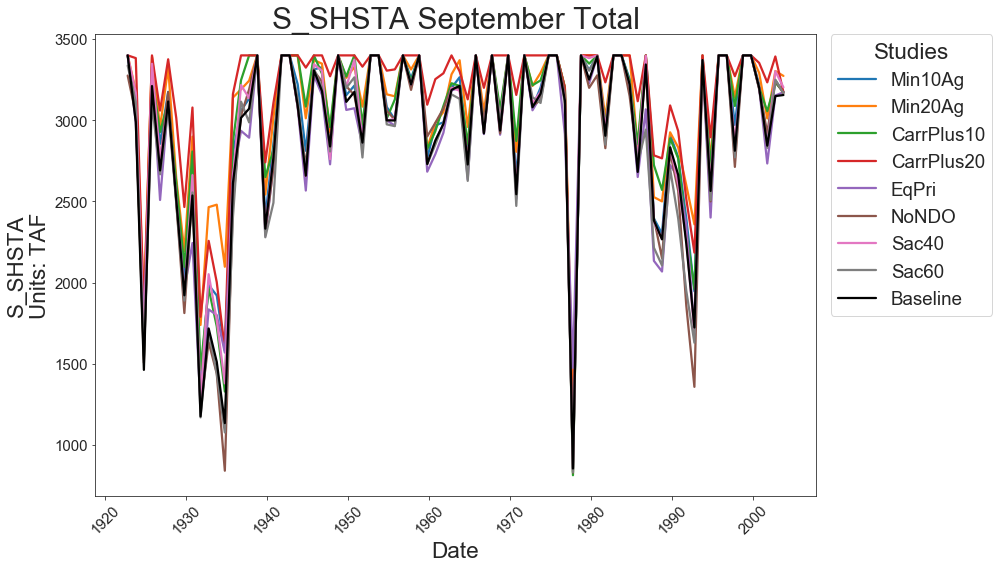

In [35]:
plot_ts(thisdata_sep, pTitle = 'September Total', fTitle = 'Sep_Tot', fPath = fPath)

In [36]:
# if you want data for just specific months, you can do that with something like the following:
thisdata_apr = thisdata[thisdata.index.month.isin([4])]  # picks only values that are in month=9 (September)
thisdata_apr

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1922-04-30     4521.661621     4529.841797        4512.844727   
1923-04-30     4234.264160     4258.224121        4234.264160   
1924-04-30     2970.934570     3108.762207        2976.866211   
1925-04-30     4388.775879     4552.000000        4328.164551   
1926-04-30     4324.356934     4378.237305        4329.478516   
..                     ...             ...                ...   
1999-04-30     4552.100098     4552.100098        4552.100098   
2000-04-30     4552.100098     4552.100098        4552.100098   
2001-04-30     4200.474609     4243.263184        4212.479004   
2002-04-30     4552.100098     4552.100098        4552.100098   
2003-04-30     4552.100098     4552.100098        4552.100098   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1922-04-30        4512.844727   4512.844727   4453.847168   4552.000000   
1923-04-30        4245.011719   4231.129883   4281.845703   4236.533691   
1924-04-30        3194.737793   2902.197998   2966.044189   3056.898926   
1925-04-30        4552.000000   4480.626465   4173.640625   4403.437500   
1926-04-30        4379.635742   4305.735840   4195.275879   4371.236328   
..                        ...           ...           ...           ...   
1999-04-30        4552.100098   4552.100098   4552.100098   4552.100098   
2000-04-30        4552.100098   4552.100098   4552.100098   4552.100098   
2001-04-30        4327.712891   4217.707031   4150.042480   4211.025879   
2002-04-30        4552.100098   4552.100098   4552.100098   4552.100098   
2003-04-30        4552.100098   4552.100098   4552.100098   4552.100098   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1922-04-30   4392.574707      4512.844727  
1923-04-30   4224.668457      4232.706543  
1924-04-30   2969.901123      2901.987061  
1925-04-30   4010.779297      4267.093750  
1926-04-30   4079.579834      4251.626465  
..                   ...              ...  
1999-04-30   4552.100098      4552.100098  
2000-04-30   4524.535156      4552.100098  
2001-04-30   4183.152832      4212.483398  
2002-04-30   4552.100098      4552.100098  
2003-04-30   4552.100098      4552.100098  

[82 rows x 9 columns]

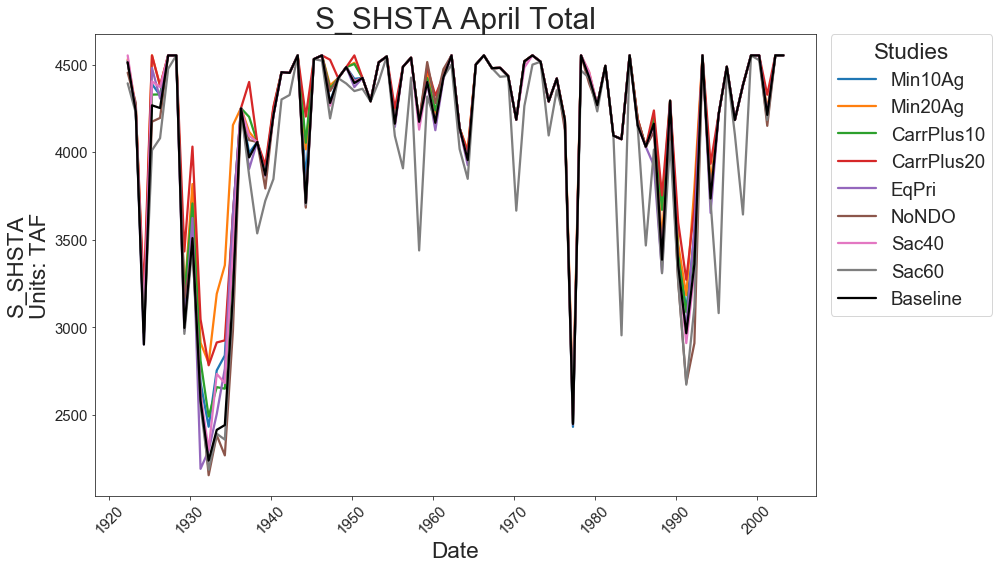

In [37]:
plot_ts(thisdata_apr, pTitle = 'April Total', fTitle = 'Apr_Tot', fPath = fPath)

## Get Summer Season

In [38]:
# if we want to pick several months and calculate the total volume, we could extend the month list in the filtering step
# NOTE: a functions that adds up the selected months?
thisdata_summer = thisdata[thisdata.index.month.isin([6,7,8])]  # picks values that are in Jun, Jul, Aug (months 6,7,8)
thisdata_summer

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1922-06-30     4335.022461     4358.215820        4321.290527   
1922-07-31     3944.379150     3992.502930        3915.043457   
1922-08-31     3601.588867     3667.894775        3559.652100   
1923-06-30     3701.001953     3779.942627        3713.220215   
1923-07-31     3360.983643     3475.808594        3381.444092   
..                     ...             ...                ...   
2002-07-31     3454.203857     3500.551514        3442.531982   
2002-08-31     3252.990234     3300.566162        3244.445557   
2003-06-30     4403.368164     4423.783691        4393.123047   
2003-07-31     3746.246338     3842.039551        3758.466064   
2003-08-31     3461.167725     3556.150635        3444.735840   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1922-06-30        4353.906738   4321.290527   4321.290527   4384.565918   
1922-07-31        3984.513916   3915.043457   3915.043457   4045.640381   
1922-08-31        3658.648926   3559.652100   3559.652100   3700.000000   
1923-06-30        3865.739502   3670.623779   3721.068359   3827.950684   
1923-07-31        3578.697754   3313.454346   3363.627686   3483.479004   
..                        ...           ...           ...           ...   
2002-07-31        3611.420898   3392.881348   3472.783447   3425.362305   
2002-08-31        3436.020752   3210.759766   3259.623535   3318.752686   
2003-06-30        4393.449219   4393.123047   4393.123047   4464.995605   
2003-07-31        3758.790527   3711.421143   3753.807617   3807.042969   
2003-08-31        3447.312012   3389.102539   3486.302734   3492.752441   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
D                   1MON             1MON  
E               2020D09E         2020D09E  
F               PER-AVER         PER-AVER  
Units                TAF              TAF  
1922-06-30   4144.862305      4321.290527  
1922-07-31   3813.100342      3915.043457  
1922-08-31   3576.786377      3559.652100  
1923-06-30   3650.816895      3672.191895  
1923-07-31   3351.171631      3315.013672  
..                   ...              ...  
2002-07-31   3407.886963      3420.016846  
2002-08-31   3309.268799      3207.097656  
2003-06-30   4367.248535      4393.123047  
2003-07-31   3697.467773      3733.640137  
2003-08-31   3393.242188      3420.052246  

[246 rows x 9 columns]

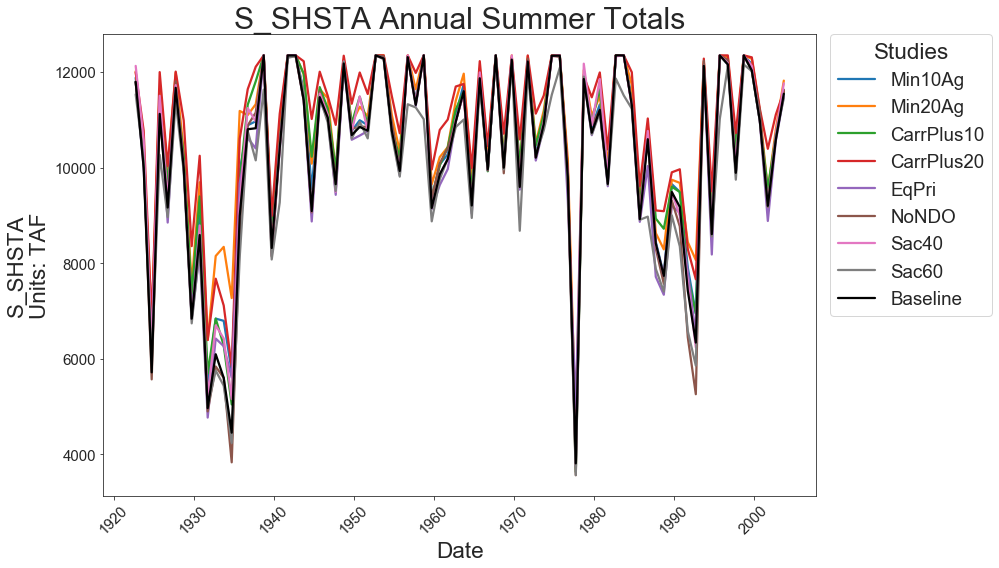

A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
E                     1MON            1MON               1MON   
F                 2020D09E        2020D09E           2020D09E   
Type              PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
                   CALLITE         CALLITE            CALLITE   
           S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
                   STORAGE         STORAGE            STORAGE   
                      1MON            1MON               1MON   
                  2020D09E        2020D09E           2020D09E   
                  PER-AVER        PER-AVER           PER-AVER   
                       TAF             TAF                TAF   
1922-09-30    11880.990234    12018.613281       11795.986328   
1923-09-30    10136.384766    10436.094727       10196.100586   
1924-09-30     6111.458008     6783.559570        5953.152344   
1925-09-30    11443.312500    11647.464844       11265.494141   
1926-09-30     9556.878906     9964.751953        9678.484375   
...                    ...             ...                ...   
1999-09-30    12168.837891    12279.874023       12035.401367   
2000-09-30    11089.773438    11186.845703       10982.546875   
2001-09-30     9233.520508     9516.092773        9574.046875   
2002-09-30    10688.660156    10804.635742       10661.956055   
2003-09-30    11610.782227    11821.973633       11596.325195   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
E                        1MON          1MON          1MON          1MON   
F                    2020D09E      2020D09E      2020D09E      2020D09E   
Type                 PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
                      CALLITE       CALLITE       CALLITE       CALLITE   
           S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
                      STORAGE       STORAGE       STORAGE       STORAGE   
                         1MON          1MON          1MON          1MON   
                     2020D09E      2020D09E      2020D09E      2020D09E   
                     PER-AVER      PER-AVER      PER-AVER      PER-AVER   
                          TAF           TAF           TAF           TAF   
1922-09-30       11997.069336  11795.986328  11795.986328  12130.206055   
1923-09-30       10773.925781   9997.152344  10147.716797  10575.595703   
1924-09-30        6786.685059   6254.253906   5570.844727   6208.370117   
1925-09-30       12000.037109  11410.846680  11108.225586  11504.293945   
1926-09-30       10030.596680   8852.285156   9336.509766   9340.605469   
...                       ...           ...           ...           ...   
1999-09-30       12309.489258  12035.447266  12036.244141  12130.073242   
2000-09-30       11233.119141  10972.290039  11193.556641  10982.816406   
2001-09-30       10395.958008   8885.445312   9181.148438   9214.985352   
2002-09-30       11110.743164  10561.036133  10689.820312  10703.462891   
2003-09-30       11599.551758  11493.646484  11633.233398  11764.791016   

A                                          
B          S_SHSTA_Sac60 S_SHSTA_Baseline  
C                STORAGE          STORAGE  
E                   1MON             1MON  
F               2020D09E         2020D09E  
Type            PER-AVER         PER-AVER  
Units                TAF              TAF  
                 CALLITE          CALLITE  
           S_SHSTA_Sac60 S_SHSTA_Baseline  
                 STORAGE          STORAGE  
                    1MON             1MON  
              

In [39]:
plot_annual_totals(thisdata_summer, pTitle = 'Annual Summer Totals', fTitle = 'Ann_Summ_Tot', pSave = False, fPath = fPath)

## Exceedance Calculation

The function single_exceed returns a dataframe with an index of the exceedance probability, and a single column of the corresponding values. This can then be plotted directly. The single_exceed function will only calculate one set of exceedance-value pairs at a time from the input dataframe (the first argument to the function).If you have multiple columns, you'll need to specify which column name to use as the second argument to the function.


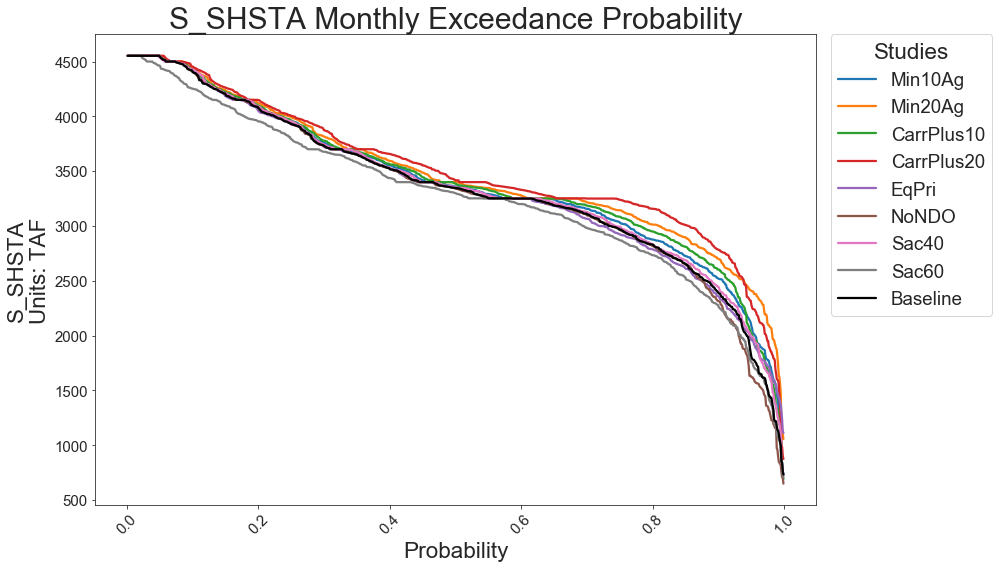

In [40]:
plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

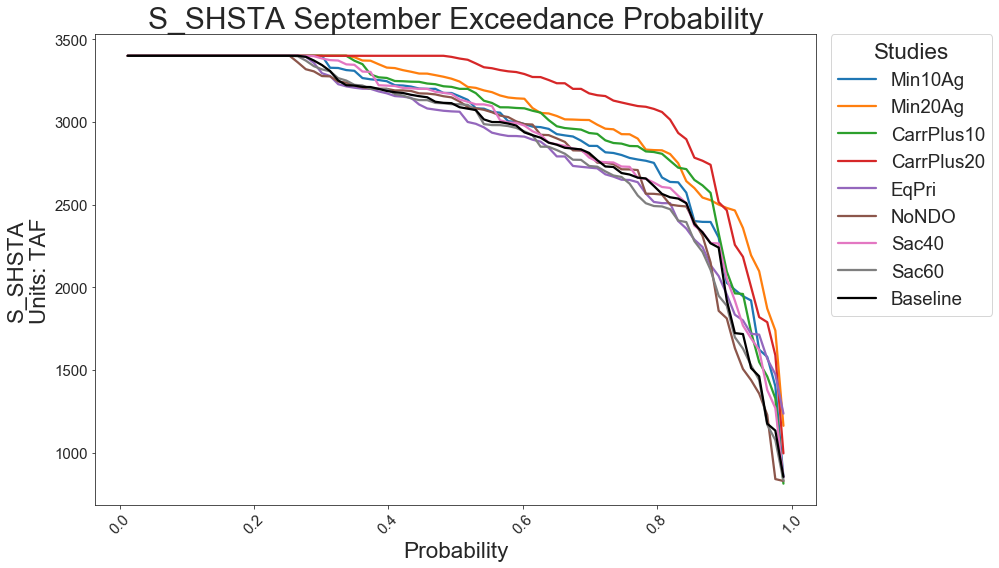

In [41]:
plot_exceedance(thisdata_sep, xLab = 'Probability', pTitle = 'September Exceedance Probability', fTitle = 'sep_exceed', fPath = fPath)

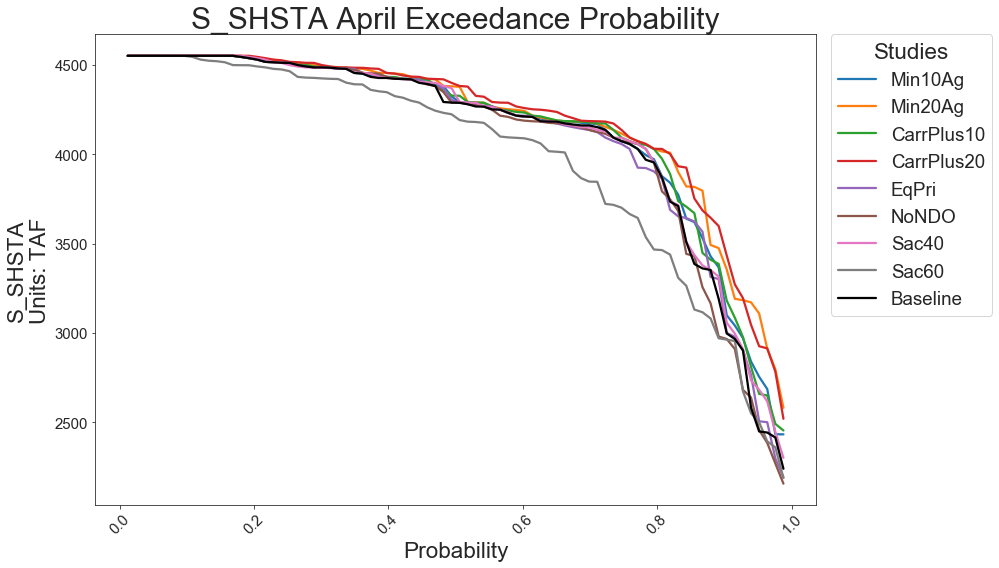

In [42]:
plot_exceedance(thisdata_apr, xLab = 'Probability', pTitle = 'April Exceedance Probability', fTitle = 'apr_exceed', fPath = fPath)

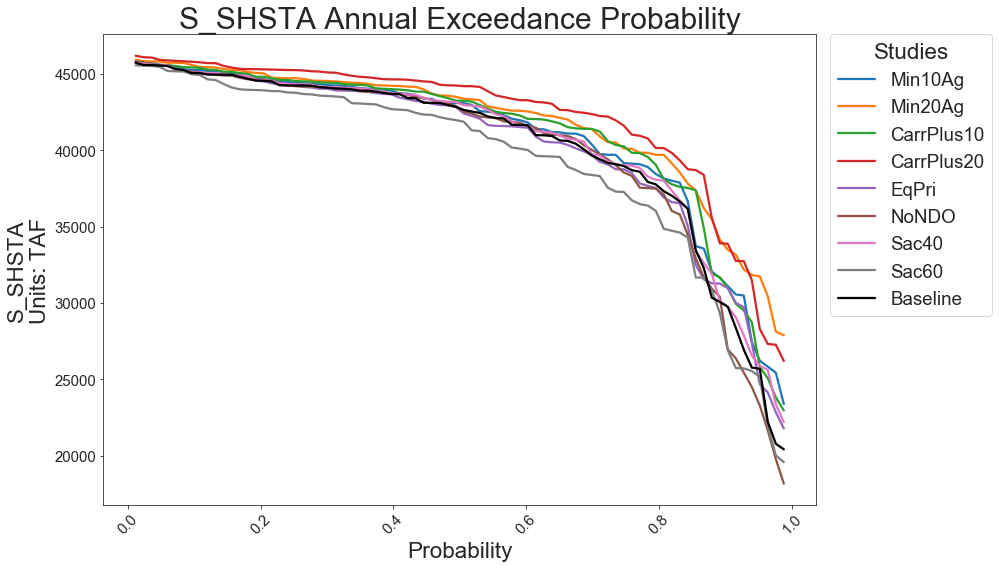

In [43]:
plot_exceedance(filter_df_ann, xLab = 'Probability', pTitle = 'Annual Exceedance Probability', fTitle = 'ann_exceed', fPath = fPath)

## Average by Month of Year

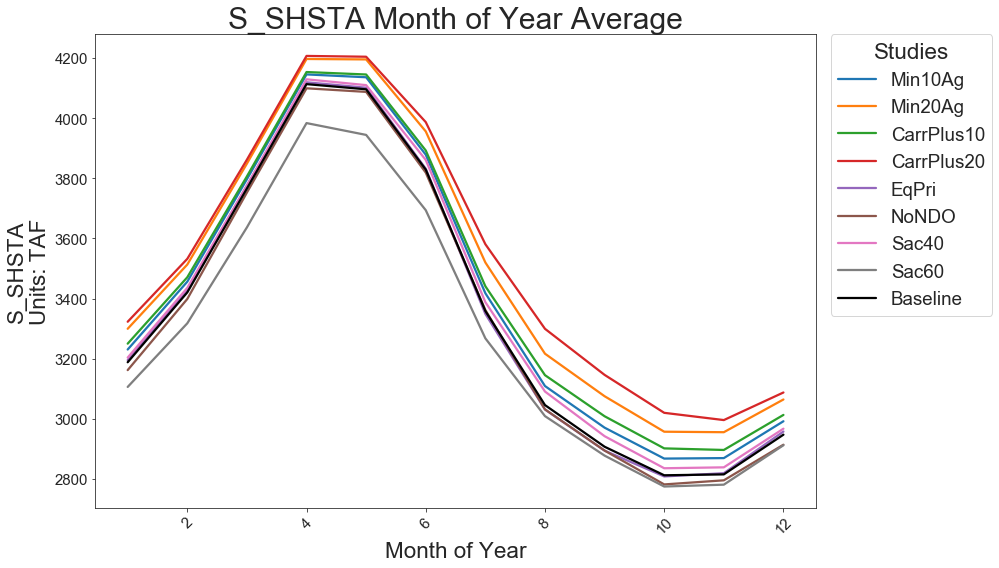

In [44]:
plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)

## Yearly totals (not WY Total)

In [45]:
thisdata_yr = thisdata
thisdata_yr["Year"] = thisdata_yr.index.year
thisdata_yr


A                  CALLITE                                     \
B          S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10   
C                  STORAGE         STORAGE            STORAGE   
D                     1MON            1MON               1MON   
E                 2020D09E        2020D09E           2020D09E   
F                 PER-AVER        PER-AVER           PER-AVER   
Units                  TAF             TAF                TAF   
1921-10-31     2737.145752     2736.188965        2738.305664   
1921-11-30     2714.284180     2722.502930        2705.427979   
1921-12-31     2889.640381     2897.853027        2880.790771   
1922-01-31     3036.285156     3044.492920        3027.440918   
1922-02-28     3462.904053     3471.106445        3454.065674   
..                     ...             ...                ...   
2003-05-31     4552.000000     4552.000000        4552.000000   
2003-06-30     4403.368164     4423.783691        4393.123047   
2003-07-31     3746.246338     3842.039551        3758.466064   
2003-08-31     3461.167725     3556.150635        3444.735840   
2003-09-30     3174.827393     3273.408936        3174.220459   

A                                                                        \
B          S_SHSTA_CarrPlus20 S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40   
C                     STORAGE       STORAGE       STORAGE       STORAGE   
D                        1MON          1MON          1MON          1MON   
E                    2020D09E      2020D09E      2020D09E      2020D09E   
F                    PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                     TAF           TAF           TAF           TAF   
1921-10-31        2738.305664   2738.305664   2748.446777   2741.606201   
1921-11-30        2705.427979   2705.427979   2633.735107   2766.697998   
1921-12-31        2880.790771   2880.790771   2809.150391   2942.015625   
1922-01-31        3027.440918   3027.440918   2955.844238   3088.628662   
1922-02-28        3454.065674   3454.065674   3395.007568   3515.213135   
..                        ...           ...           ...           ...   
2003-05-31        4552.000000   4552.000000   4552.000000   4552.000000   
2003-06-30        4393.449219   4393.123047   4393.123047   4464.995605   
2003-07-31        3758.790527   3711.421143   3753.807617   3807.042969   
2003-08-31        3447.312012   3389.102539   3486.302734   3492.752441   
2003-09-30        3172.613770   3173.188721   3166.376709   3203.129639   

A                                          Year  
B          S_SHSTA_Sac60 S_SHSTA_Baseline        
C                STORAGE          STORAGE        
D                   1MON             1MON        
E               2020D09E         2020D09E        
F               PER-AVER         PER-AVER        
Units                TAF              TAF        
1921-10-31   2741.606201      2738.305664  1921  
1921-11-30   2766.697998      2705.427979  1921  
1921-12-31   2942.015625      2880.790771  1921  
1922-01-31   3088.628662      3027.440918  1922  
1922-02-28   3515.213135      3454.065674  1922  
..                   ...              ...   ...  
2003-05-31   4552.000000      4552.000000  2003  
2003-06-30   4367.248535      4393.123047  2003  
2003-07-31   3697.467773      3733.640137  2003  
2003-08-31   3393.242188      3420.052246  2003  
2003-09-30   3168.116211      3155.764893  2003  

[984 rows x 10 columns]

In [46]:
thisdata_yrtot = thisdata_yr.groupby('Year').sum()
thisdata_yrtot

A             CALLITE                                                        \
B     S_SHSTA_Min10Ag S_SHSTA_Min20Ag S_SHSTA_CarrPlus10 S_SHSTA_CarrPlus20   
C             STORAGE         STORAGE            STORAGE            STORAGE   
D                1MON            1MON               1MON               1MON   
E            2020D09E        2020D09E           2020D09E           2020D09E   
F            PER-AVER        PER-AVER           PER-AVER           PER-AVER   
Units             TAF             TAF                TAF                TAF   
Year                                                                          
1921      8341.070312     8356.544922        8324.524414        8324.524414   
1922     44633.425781    44803.832031       44513.093750       44714.175781   
1923     41148.351562    42147.812500       41319.335938       42970.371094   
1924     27802.585938    30167.820312       27378.171875       30412.478516   
1925     42260.800781    43559.953125       41673.777344       43893.089844   
..                ...             ...                ...                ...   
1999     45548.382812    45687.917969       45415.578125       45696.574219   
2000     43263.125000    43601.183594       43123.460938       43892.003906   
2001     39454.851562    40365.195312       40349.472656       42387.968750   
2002     44367.210938    44693.980469       44281.632812       45291.187500   
2003     35484.265625    35808.746094       35488.164062       35548.160156   

A                                                                               
B     S_SHSTA_EqPri S_SHSTA_NoNDO S_SHSTA_Sac40 S_SHSTA_Sac60 S_SHSTA_Baseline  
C           STORAGE       STORAGE       STORAGE       STORAGE          STORAGE  
D              1MON          1MON          1MON          1MON             1MON  
E          2020D09E      2020D09E      2020D09E      2020D09E         2020D09E  
F          PER-AVER      PER-AVER      PER-AVER      PER-AVER         PER-AVER  
Units           TAF           TAF           TAF           TAF              TAF  
Year                                                                            
1921    8324.524414   8191.332031   8450.320312   8450.320312      8324.524414  
1922   44513.093750  44143.296875  45069.878906  44108.500000     44513.093750  
1923   40785.179688  41287.546875  42014.503906  41181.925781     40769.183594  
1924   28081.300781  26242.867188  28339.890625  27235.763672     26436.271484  
1925   42504.433594  40413.675781  42427.035156  38311.503906     40934.078125  
..              ...           ...           ...           ...              ...  
1999   45415.625000  45252.851562  45510.250000  45400.082031     45415.351562  
2000   43118.457031  43319.250000  43122.269531  43053.058594     43123.449219  
2001   38695.695312  39316.523438  39314.523438  39226.222656     39324.703125  
2002   43939.328125  44107.156250  44525.261719  44250.703125     43951.816406  
2003   35365.492188  35498.265625  35666.578125  35324.730469     35401.238281  

[83 rows x 9 columns]

In [47]:
# # NEED TO PLOT THIS EXAMPLE WITH JUST ORIGINAL VAR NAME LIKE S_SHSTA (and units) ON Y AND LEGEND WITH ALIASES
# with sns.plotting_context('notebook', font_scale=1.2):
#     fig, ax = plt.subplots(1,1,figsize=(10,8))
#     ax.plot(thisdata_yrtot.index, thisdata_yrtot.values)
#     ax.set_ylabel(f'{thisdata_yrtot.columns[0][1]} ({thisdata_yrtot.columns[0][6]})')
#     ax.set_xlabel('Annual Total')
#     sns.despine()


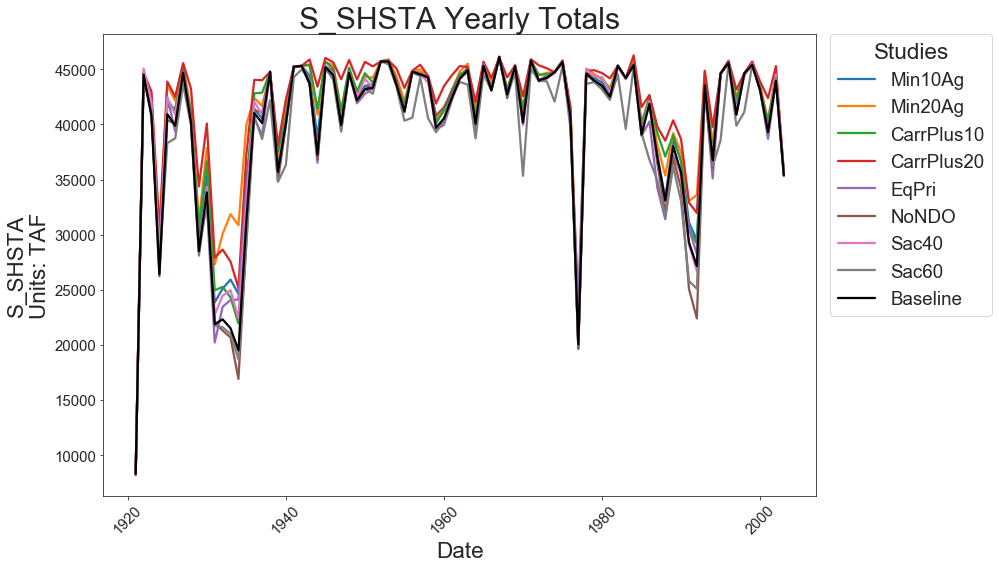

In [48]:
plot_ts(thisdata_yrtot, xLab = 'Date', pTitle = 'Yearly Totals', fTitle = 'Yr_Tot', fPath = fPath, pSave = False)

## Hack to get DEL_SWP_PAG
Make sure to duplicate the plotting functions and change colormap to tab20

In [49]:
merged_df

A                        CALLITE                                              \
B          DEL_CVP_PAG_N_Min10Ag DEL_CVP_PAG_S_Min10Ag DEL_CVP_PEX_S_Min10Ag   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                       2020D09E              2020D09E              2020D09E   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        CFS                   CFS                   CFS   
1921-10-31             72.608154            829.896667            978.930847   
1921-11-30              0.000000            632.994080            336.382050   
1921-12-31              0.000000            875.842407            147.935471   
1922-01-31              0.000000           1537.437500            153.597214   
1922-02-28              0.000000           1938.772217            442.686554   
..                           ...                   ...                   ...   
2003-05-31            681.666260           2185.820068           1563.312378   
2003-06-30           1323.209961           3647.889648           2131.734619   
2003-07-31           1480.088501           4387.067383           2421.484131   
2003-08-31           1040.537842           3161.168457           2372.007812   
2003-09-30            590.072754           1008.067017           1593.776001   

A                                                         \
B          DEL_CVP_PSC_N_Min10Ag DEL_CVP_TOTAL_N_Min10Ag   
C                   DELIVERY-CVP            DELIVERY-CVP   
D                           1MON                    1MON   
E                       2020D09E                2020D09E   
F                       PER-AVER                PER-AVER   
Units                        CFS                     CFS   
1921-10-31            758.318115             1301.978271   
1921-11-30            940.111389             1259.847778   
1921-12-31              0.000000              281.372681   
1922-01-31             21.212244              215.815094   
1922-02-28              0.000000              202.722061   
..                           ...                     ...   
2003-05-31           4375.306641             5521.422852   
2003-06-30           5937.718262             7988.208008   
2003-07-31           6170.516113             8514.912109   
2003-08-31           4286.275391             6107.203125   
2003-09-30           1394.580933             2365.932373   

A                                                                             \
B          DEL_CVP_TOTAL_S_Min10Ag DEL_SWP_PAG_Min10Ag DEL_SWP_PAG_N_Min10Ag   
C                     DELIVERY-CVP        DELIVERY-SWP          DELIVERY-SWP   
D                             1MON                1MON                  1MON   
E                         2020D09E            2020D09E              2020D09E   
F                         PER-AVER            PER-AVER              PER-AVER   
Units                          CFS                 CFS                   CFS   
1921-10-31             3170.878906         2526.639404           1737.846313   
1921-11-30             1981.838867         2404.505371           1861.215332   
1921-12-31             1660.865967         1594.614136           1066.068604   
1922-01-31             2098.740479          560.044067            542.060486   
1922-02-28             2748.421387           29.456339              0.000000   
..                             ...                 ...                   ...   
2003-05-31             4679.937988         2437.397461           1919.069824   
2003-06-30             6950.992676         4231.704590           2579.114990   
2003-07-31             7707.017090         4401.756836           2400.044678   
2003-08-31             6437.394531         3315.328613           1727.323853   
2003-09-30             3891.585938         2556.442871           1603.552490   

A                                    

In [50]:
def get_DEL_SWP_PAG(df):
    df_concat = pnd.DataFrame()
    for i in alias:
        var = "DEL_SWP_PAG_" + i
        filtered_columns = df.columns.get_level_values(1) == var
        filter_df = df.loc[:, filtered_columns]
        df_concat = pnd.concat([df_concat, filter_df], axis=1)
    return df_concat

In [51]:
filter_del_swp_pag = get_DEL_SWP_PAG(merged_df)
filter_del_swp_pag

A                      CALLITE                                             \
B          DEL_SWP_PAG_Min10Ag DEL_SWP_PAG_Min20Ag DEL_SWP_PAG_CarrPlus10   
C                 DELIVERY-SWP        DELIVERY-SWP           DELIVERY-SWP   
D                         1MON                1MON                   1MON   
E                     2020D09E            2020D09E               2020D09E   
F                     PER-AVER            PER-AVER               PER-AVER   
Units                      CFS                 CFS                    CFS   
1921-10-31         2526.639404         2406.566406            2646.712402   
1921-11-30         2404.505371         2344.139648            2464.870850   
1921-12-31         1594.614136         1535.886841            1653.341431   
1922-01-31          560.044067          558.911560             557.208740   
1922-02-28           29.456339           27.489914              31.168232   
..                         ...                 ...                    ...   
2003-05-31         2437.397461         2300.788574            2690.756592   
2003-06-30         4231.704590         3847.700195            4636.924805   
2003-07-31         4401.756836         3965.344727            4746.109863   
2003-08-31         3315.328613         3218.977295            3472.974121   
2003-09-30         2556.442871         2529.206787            2643.368896   

A                                                                      \
B          DEL_SWP_PAG_CarrPlus20 DEL_SWP_PAG_EqPri DEL_SWP_PAG_NoNDO   
C                    DELIVERY-SWP      DELIVERY-SWP      DELIVERY-SWP   
D                            1MON              1MON              1MON   
E                        2020D09E          2020D09E          2020D09E   
F                        PER-AVER          PER-AVER          PER-AVER   
Units                         CFS               CFS               CFS   
1921-10-31            2646.712402       2646.712402       2646.712402   
1921-11-30            2464.870850       2464.870850       2464.870850   
1921-12-31            1653.341431       1653.341431       1653.341431   
1922-01-31             557.208740        557.208740        565.342896   
1922-02-28              31.168232         31.168232         37.122341   
..                            ...               ...               ...   
2003-05-31            2710.385254       2687.242188       2679.265137   
2003-06-30            4699.342285       4625.709961       4600.490723   
2003-07-31            4819.396484       4732.941895       4703.310059   
2003-08-31            3527.725342       3463.142090       3440.977295   
2003-09-30            2673.726318       2637.917480       2625.630371   

A                                                                    
B          DEL_SWP_PAG_Sac40 DEL_SWP_PAG_Sac60 DEL_SWP_PAG_Baseline  
C               DELIVERY-SWP      DELIVERY-SWP         DELIVERY-SWP  
D                       1MON              1MON                 1MON  
E                   2020D09E          2020D09E             2020D09E  
F                   PER-AVER          PER-AVER             PER-AVER  
Units                    CFS               CFS                  CFS  
1921-10-31       2646.712402       2646.712402          2646.712402  
1921-11-30       2464.870850       2464.870850          2464.870850  
1921-12-31       1653.341431       1653.341431          1653.341431  
1922-01-31        557.208740        557.208740           557.208740  
1922-02-28         31.168232         31.168232            31.168232  
..                       ...               ...                  ...  
2003-05-31       2679.666504       2687.557617          2687.311279  
2003-06-30       4601.642578       4626.745605          4625.952637  
2003-07-31       4704.683594       4734.158203          4733.227051  
2003-08-31       3442.027832       3464.046143          3463.352051  
2003-09-30       2626.210449       2638.418701          2638.033691  

[984 rows x 9 columns]

In [66]:
pagPath = './' + 'DEL_SWP_PAG' + './'

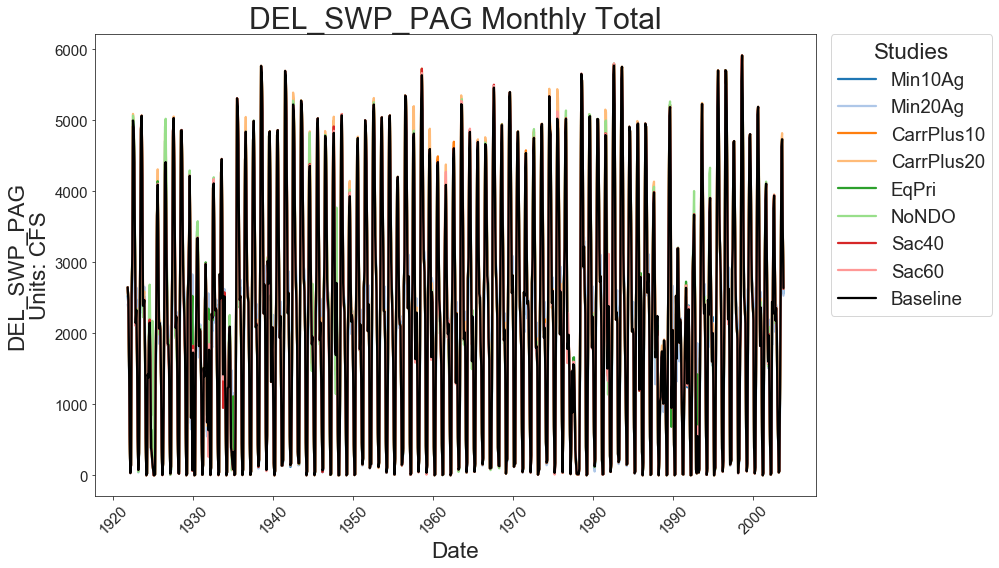

In [67]:
plot_ts(filter_del_swp_pag, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = pagPath, cMap = plt.cm.tab20)

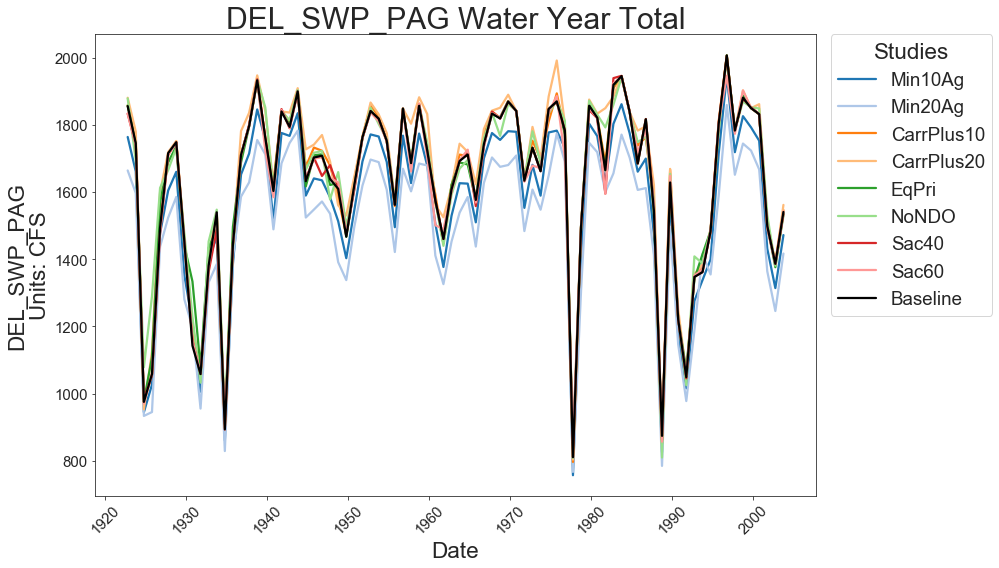

In [68]:
filter_del_swp_pag_ann = plot_annual_totals(filter_del_swp_pag, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = pagPath, cMap = plt.cm.tab20)


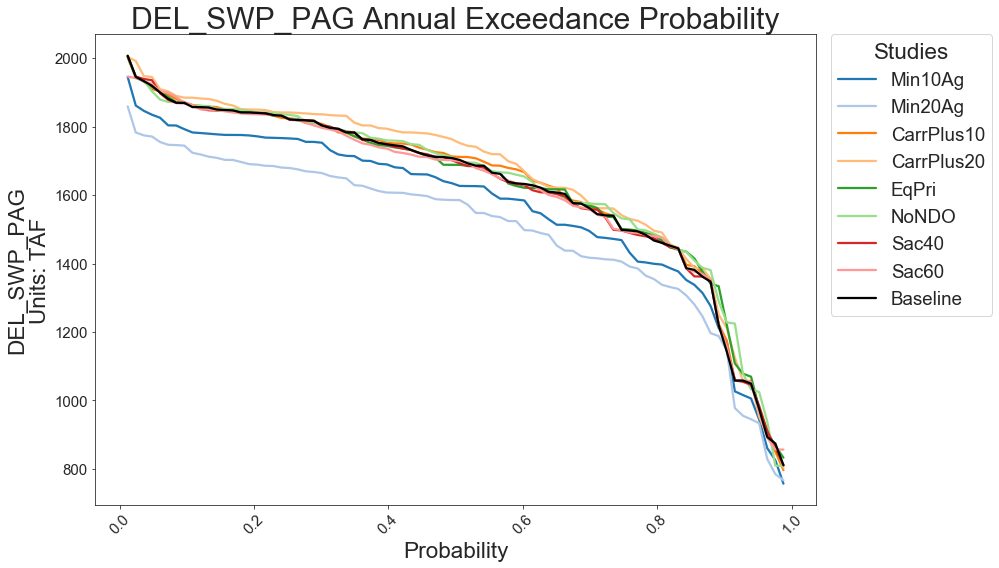

In [69]:
plot_exceedance(filter_del_swp_pag_ann, xLab = 'Probability', pTitle = 'Annual Exceedance Probability', fTitle = 'ann_exceed', fPath = pagPath, cMap = plt.cm.tab20)

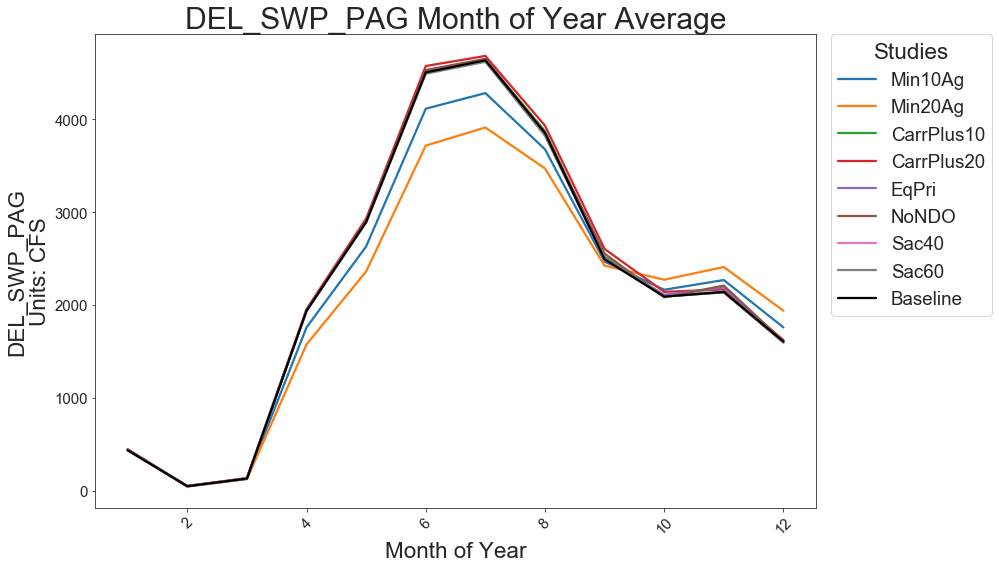

In [70]:
# plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)
plot_moy_averages(filter_del_swp_pag, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = pagPath, cMap = plt.cm.tab20)